In [1]:
from abc import ABC, abstractmethod
import numpy as np

class Perceptron(ABC):
    """ Base class for our perceptrons.
    """
    def __init__(self, lr=0.5, epochs=100):
        """ Constructor. """
        self.learning_rate = lr
        self.epochs = epochs
        self.weights = None
    def evaluate(self, X, y):
        """ Get prediction accuracy against a test set. """
        predictions = self.predict(X)
        return np.count_nonzero(predictions == y) / y.shape[0]
    def predict(self, X):
        """ Predict labels for a list of inputs. """
        predictions = []
        for x in X:
            prediction = 0 if np.dot(self.weights, x) < 0 else 1
            predictions.append(prediction)
        return np.array(predictions)
    @abstractmethod
    def fit(self):
        """ Abstract training method. """
        pass

In [2]:
class SimplePerceptron(Perceptron):
    """ 
    Simple perceptron. 
    Extends the abstract class above by implementing fit().
    """
    def fit(self, X, y):
        """ Simple perceptron training. """
        self.weights = np.random.randn(X.shape[1])
        for epoch in range(self.epochs):
            # the training data is shuffled every epoch
            the_data = list(zip(X, y))
            np.random.shuffle(the_data)
            for x, label in the_data:
                # attempt prediction
                prediction = 0 if np.dot(self.weights, x) < 0 else 1
                # if the prediction fails, update the weights
                if prediction != label:
                    update = self.learning_rate * (label - prediction) * x
                    self.weights += update

In [3]:
class AveragedPerceptron(Perceptron):
    def fit(self, X, y):
        self.weights = np.random.randn(X.shape[1])
        step = self.epochs * X.shape[0]
        num_iter = self.epochs * X.shape[0]
        for epoch in range(self.epochs):
            # the training data is shuffled every epoch
            the_data = list(zip(X, y))
            np.random.shuffle(the_data)
            for x, label in the_data:
                # attempt prediction
                # self.weights *= np.random.randint(low=0, high=2, size=len(self.weights))
                prediction = 0 if np.dot(self.weights, x) < 0 else 1
                # if the prediction fails, update the weights
                if prediction != label:
                    update = self.learning_rate * (label - prediction) * x
                    self.weights += (step / num_iter) * update
                step -= 1

In [4]:
# the breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = np.array(data['data'])  # data points
y = np.array(data['target'])  # labels

b = np.ones_like(y)  # bias
X = np.column_stack((X, b))  # gets glued to data

In [5]:
# x- and y-axis values for plotting
xs = []
ys_averaged = []  # UNCOMMENT THIS LINE
ys_simple = []

# stack the data together for shuffling
the_data = np.column_stack((X, y))
# 50% of the data for training, 50% for testing
cutoff = len(the_data) // 2

# test these epoch numbers
for epochs in range(0, 51, 5):
    xs.append(epochs)
    scores_averaged = []  # UNCOMMENT THIS LINE
    scores_simple = []

    # do 10 runs for each epoch
    for experiments in range(0, 10):

        # prepare training and test data
        # the data is randomly shuffled for each experiment
        np.random.shuffle(the_data)
        X_train = the_data[:cutoff,:-2]
        y_train = the_data[:cutoff,-1]
        X_test = the_data[cutoff:,:-2]
        y_test = the_data[cutoff:,-1]
        
        # create the perceptrons
        averaged_perceptron = AveragedPerceptron(epochs=epochs)  # UNCOMMENT THIS LINE
        simple_perceptron = SimplePerceptron(epochs=epochs)
        # train the perceptrons with training data
        averaged_perceptron.fit(X_train, y_train)  # UNCOMMENT THIS LINE
        simple_perceptron.fit(X_train, y_train)
        # evaluate the perceptrons against test data
        scores_averaged.append(averaged_perceptron.evaluate(X_test, y_test))  # UNCOMMENT THIS LINE
        scores_simple.append(simple_perceptron.evaluate(X_test, y_test))

    # store the experiment means for plotting
    ys_averaged.append(np.mean(scores_averaged))  # UNCOMMENT THIS LINE
    ys_simple.append(np.mean(scores_simple))

print("averaged: {:.2f}".format(ys_averaged[-1]))  # UNCOMMENT THIS LINE
print("simple: {:.2f}".format(ys_simple[-1]))

averaged: 0.91
simple: 0.90


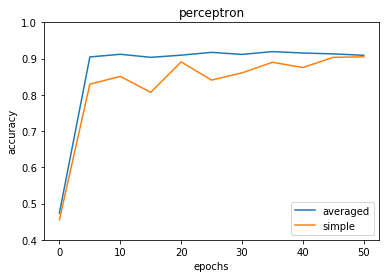

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("perceptron")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.4, 1)

plt.plot(xs, ys_averaged, label="averaged")  # UNCOMMENT THIS LINE
plt.plot(xs, ys_simple, label="simple")
plt.legend(loc=4)
plt.show()